In [ ]:
import pandas as pd

In [ ]:
squares_list = [0,1,4,9,16,25]

In [ ]:
squares_list[00]

In [ ]:
squares_list[0]

In [ ]:
squares_list[2:5]

In [ ]:
squares_list[-2]

In [ ]:
squares_list

In [ ]:
greeting = 'Hello'

In [ ]:
print(greeting[1])

In [ ]:
print(len(greeting))

In [ ]:
print(greeting + ' World')

In [ ]:
stmt = r'\n is a newling character by default'

In [ ]:
print(stmt)

In [ ]:
tuple_example = 0, 1, 4, 9, 16, 25

In [ ]:
tuple_example

In [ ]:
tuple_example[4]

In [ ]:
tuple_example[2] = 6

In [ ]:
extensions = {'Kunal':9073, 'Tavish':9128, 'Sunil': 9223, 'Nitin':9330}
extensions

In [ ]:
extensions['Mukesh'] = 9150
extensions

In [ ]:
extensions.keys()

In [ ]:
for i in [Python Iterable]:
    expressions(i)

In [ ]:
fact = 1
for i in range(1,N+1):
    fact *= 1

In [ ]:
N=354
if N%2 == 0:
    print('Even')
else:
    print('Odd')

In [ ]:
import math as m

In [ ]:
m.factorial(3)

In [ ]:
plot(arange(5))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
import nsfg

In [ ]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome==1]

In [ ]:
import thinkstats2 as ts2
import thinkplot as tp

In [ ]:
hist = ts2.Hist(live.birthwgt_lb, label='birthwgt_lb')
tp.Hist(hist)
tp.Show(xlabel='pounds', ylabel='frequency')

In [ ]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

In [ ]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

In [ ]:


first_hist = ts2.Hist(firsts.prglngth)
other_hist = ts2.Hist(others.prglngth)

width = 0.45
tp.PrePlot(2)
tp.Hist(first_hist, align='right', width=width)
tp.Hist(other_hist, align='left', width=width)
tp.Show(xlabel='weeks', ylabel='frequency', xlim=[27, 46])

In [ ]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()
mean, var, std

In [ ]:
import math
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [ ]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

In [ ]:
def AllModes(d):
    return sorted(d.items(), key=lambda kv: kv[1], reverse = True)

In [ ]:
d = {4:6, 6:9, 2:7}

In [ ]:
d.items()

In [ ]:
AllModes(d)

In [ ]:
from analytic import *


In [ ]:
df = ReadBabyBoom()

In [ ]:
diffs = df.minutes.diff()
cdf = ts2.Cdf(diffs, label='actual')

In [ ]:
tp.Cdf(cdf)
tp.Show(xlabel='minutes', ylabel='CDF')

In [ ]:
tp.Cdf(cdf, complement =True)
tp.Show(xlabel='minutes', ylabel='CCDF', yscale='log')

In [ ]:
import scipy.stats
scipy.stats.norm.cdf(0)

In [ ]:
def EvalNormalCdf(x, mu=0, sigma=1):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

In [ ]:
def MakeNormalPlot(weights):
    mean = weights.mean()
    std = weights.std()
    
    xs = [-4, 4]
    fxs, fys = ts2.FitLine(xs, inter=mean, slope=std)
    tp.Plot(fxs, fys, color='gray', label='model')
    
    xs, ys = ts2.NormalProbability(weights)
    tp.Plot(xs, ys, label='birth weights')
    

In [ ]:
def expovariate(lam):
    p = random.random()
    x = -math.log(1-p) / lam
    return x

In [ ]:
import math
import random
import first
import brfss

In [ ]:
mean, var = 163, 52.8
std = math.sqrt(var)
pdf = ts2.NormalPdf(mean, std)
pdf.Density(mean + std)

In [ ]:
tp.Pdf(pdf, label='normal')
tp.Show()

In [ ]:
pmf = pdf.MakePmf()

In [ ]:
sample = [random.gauss(mean, std) for i in range(500)]
sample_pdf = ts2.EstimatedPdf(sample)
tp.Pdf(sample_pdf, label='sample KDE')

In [ ]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
live, firsts, others = first.MakeFrames()
data = live.totalwgt_lb.dropna()
pdf = ts2.EstimatedPdf(data)
tp.Pdf(pdf, label='birthweight')

In [ ]:
df = brfss.ReadBrfss(nrows=None)
data = df.wtkg2.dropna()
pdf = ts2.EstimatedPdf(data)
tp.Pdf(pdf, label='adult weight')

In [1]:
import numpy as np

import density
import hinc
import thinkplot as tp
import thinkstats2 as ts2

In [ ]:
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.log_lower[0] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.log_upper[41] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, row.freq)
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample

In [ ]:
df = hinc.ReadData()
log_sample = InterpolateSample(df, log_upper=6.0)

    

In [ ]:
log_cdf = ts2.Cdf(log_sample)
tp.Cdf(log_cdf)
tp.Show(xlabel='household income', ylabel='CDF')

In [ ]:
sample = np.power(10, log_sample)
mean, median = density.Summarize(sample)

cdf = ts2.Cdf(sample)
print('cdf[mean]', cdf[mean])

pdf = ts2.EstimatedPdf(sample)
tp.Pdf(pdf)
tp.Show(xlabel='household income',
                   ylabel='PDF')

In [2]:
import scatter


In [ ]:
df = brfss.ReadBrfss(nrows=None)
sample = ts2.SampleRows(df, 5000)
heights, weights = sample.htm3, sample.wtkg2

In [ ]:
plt.figure(figsize=(12,10))
tp.Scatter(heights, weights)
tp.Show(xlabel = 'Height (cm)', ylabel='Weight (kg)', axis=[140, 210, 20, 200])

In [ ]:
heights = ts2.Jitter(heights, 1.3)
weights = ts2.Jitter(weights, 0.5)

In [ ]:
plt.figure(figsize=(14,12))
tp.Scatter(heights, weights, alpha=0.2)

In [ ]:
plt.figure(figsize=(14,12))
tp.HexBin(heights, weights)

In [ ]:
df = df.dropna(subset=['htm3','wtkg2'])
bins = np.arange(135, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

In [ ]:
for i, group in groups:
    print(i, len(group))

In [ ]:
heights = [group.htm3.mean() for i, group in groups]
cdfs = [ts2.Cdf(group.wtkg2) for i, group in groups]

In [ ]:
plt.figure(figsize=(14,12))
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    tp.Plot(heights, weights, label=label)

In [ ]:
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
age = live.agepreg
weight = live.totalwgt_lb
bins = np.arange(15, 60, 1)
indices = np.digitize(age, bins)
groups = live.groupby(indices)


In [ ]:
age = [group.agepreg.mean() for i, group in groups]
cdfs = [ts2.Cdf(group.totalwgt_lb) for i, group in groups]

In [ ]:
plt.figure(figsize=(14,12))
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    tp.Plot(age, weights, label=label)

In [ ]:
ts2.Corr(df.htm3, np.log(df.wtkg2))

In [ ]:
def ScatterPlot(ages, weights, alpha=1.0):
    """Make a scatter plot and save it.

    ages: sequence of float
    weights: sequence of float
    alpha: float
    """
    thinkplot.Scatter(ages, weights, alpha=alpha)
    thinkplot.Config(xlabel='age (years)',
                     ylabel='weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)


def HexBin(ages, weights, bins=None):
    """Make a hexbin plot and save it.

    ages: sequence of float
    weights: sequence of float
    bins: 'log' or None for linear
    """
    thinkplot.HexBin(ages, weights, bins=bins)
    thinkplot.Config(xlabel='age (years)',
                     ylabel='weight (lbs)',
                     legend=False)


def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.

    df: DataFrame
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Save(root='chap07scatter3',
                   formats=['jpg'],
                   xlabel="mother's age (years)",
                   ylabel='birth weight (lbs)')


In [13]:
#chapter 7 exercise
import sys
import numpy as np
import math
import first
import random

In [ ]:
ts2.RandomSeed(17)
    
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])
BinnedPercentiles(live)

In [ ]:
ages = live.agepreg
weights = live.totalwgt_lb
print('thinkstats2 Corr', ts2.Corr(ages, weights))
print('thinkstats2 SpearmanCorr', ts2.SpearmanCorr(ages, weights))

In [ ]:
plt.figure(figsize=(14,12))
ScatterPlot(ages, weights, alpha=0.1)

In [4]:
import estimation

In [74]:
def Estimate1(n=7, m=1000):
    mu = 0
    sigma = 1
    
    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
        
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))

In [7]:
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)
    

In [20]:
def Estimate2(n=7, m=1000):
    mu = 0
    sigma = 1
    
    estimates1 = []
    estimates2 = []
    for _ in range (m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)
        
    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))


In [19]:
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [27]:
Estimate1()

rmse xbar 0.3807444803139225
rmse median 0.3807444803139225


In [28]:
Estimate2()

mean error biased -0.127770098733
mean error unbiased 0.0176015514778


In [29]:
def SimulateSample(mu=90, sigma=7.5, n=9, m=1000):
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
        
    cdf = ts2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    stderr = RMSE(means, mu)

In [37]:
def Estimate3(n=10, m=1000, lam=2):
    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1/np.mean(xs)
        Lm = math.log(2) / ts2.Median(xs)
        means.append(L)
        medians.append(Lm)
        
    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))

In [ ]:
##These methods seem to be biased.

In [75]:
for i in [100, 1000, 10000, 100000]:
    Estimate1(n=7, m=i)

rmse xbar 0.3724902274389175
rmse median 0.4717590573013685
rmse xbar 0.36745348089437957
rmse median 0.46690115471690324
rmse xbar 0.37546020077808856
rmse median 0.4579142504896333
rmse xbar 0.37912079590905595
rmse median 0.4606527055393646


In [38]:
for i in [100, 1000, 10000, 100000]:
    Estimate2(n=9, m=i)

mean error biased -0.0646689318657
mean error unbiased 0.0522474516511
mean error biased -0.0996297032442
mean error unbiased 0.0129165838503
mean error biased -0.107459226884
mean error unbiased 0.0041083697557
mean error biased -0.111094129544
mean error unbiased 1.91042632616e-05


In [68]:
def Estimate3(n=10, m=1000, lam=2):
    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1/np.mean(xs)
        Lm = math.log(2) / ts2.Median(xs)
        means.append(L)
        medians.append(Lm)
    
    cdf = ts2.Cdf(means)
    ci = cdf.Percentile(10), cdf.Percentile(90)
        
    print('Root Mean Standard Error for L:', RMSE(means, lam))
    print('Confidence Interval: ', ci)

In [69]:
Estimate3()

Root Mean Standard Error for L: 0.8108967853429914
Confidence Interval:  (1.4215607708652773, 3.1098998310938208)


In [70]:
def Estimate3mod(n=10, m=1000, lam=2):
    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1/np.mean(xs)
        Lm = math.log(2) / ts2.Median(xs)
        means.append(L)
        medians.append(Lm)
    
    cdf = ts2.Cdf(means)
    ci = cdf.Percentile(10), cdf.Percentile(90)
    std_error = RMSE(means, lam)
    return std_error

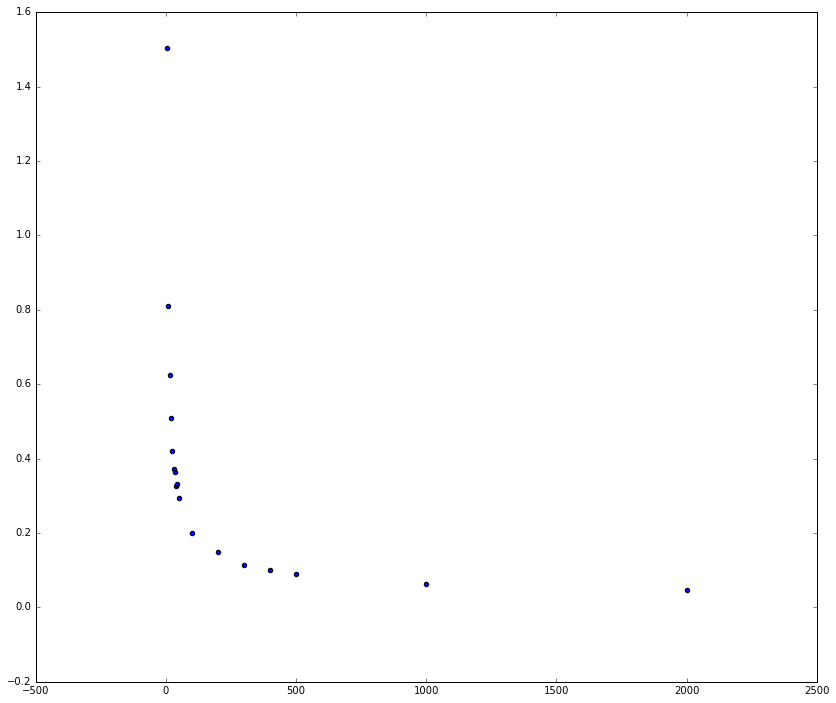

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
std_errors = []
values = []

for n in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 200, 300, 400, 500, 1000, 2000]:
    values.append(n)
    err = Estimate3mod(n=n, m=1000, lam=2)
    std_errors.append(err)
    
plt.figure(figsize=(14,12))
plt.scatter(values, std_errors)

In [47]:
Estimate3()

Root Mean Standard Error for L: 0.8457831856320396
Confidence Interval:  (1.417380834258275, 3.2951794198718387)
